# Analysing BTC Price Performance from 2015 to 2024

In [1]:
pip install --upgrade pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

# Fetch BTC-USD price data
btc = yf.download("BTC-USD", start="2014-01-01", end="2025-01-01", interval="1d")

C:\Users\chins\AppData\Local\Temp\ipykernel_18544\712266796.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2014-01-01", end="2025-01-01", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [4]:

# Inspect the head / tail
print(btc.head())

Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100


In [5]:
print(btc.tail())

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2024-12-27  94164.859375  97294.843750  93310.742188  95704.976562   
2024-12-28  95163.929688  95525.898438  94014.289062  94160.187500   
2024-12-29  93530.226562  95174.875000  92881.789062  95174.054688   
2024-12-30  92643.210938  94903.320312  91317.132812  93527.195312   
2024-12-31  93429.203125  96090.601562  91914.031250  92643.250000   

Price            Volume  
Ticker          BTC-USD  
Date                     
2024-12-27  52419934565  
2024-12-28  24107436185  
2024-12-29  29635885267  
2024-12-30  56188003691  
2024-12-31  43625106843  


In [6]:
# Save to csv if needed
btc.to_csv("BTC_Historical_Prices.csv")

In [7]:
BTC_data = pd.read_csv("BTC_Historical_Prices.csv")

In [8]:
BTC_data

,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2014-09-17,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
3,2014-09-18,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
4,2014-09-19,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700
...,...,...,...,...,...,...
3756,2024-12-27,94164.859375,97294.84375,93310.7421875,95704.9765625,52419934565
3757,2024-12-28,95163.9296875,95525.8984375,94014.2890625,94160.1875,24107436185
3758,2024-12-29,93530.2265625,95174.875,92881.7890625,95174.0546875,29635885267
3759,2024-12-30,92643.2109375,94903.3203125,91317.1328125,93527.1953125,56188003691


#### Create Checkpoint No. 1 

In [9]:
df = BTC_data.copy()

#### Data Manipulation

In [10]:
# drops rows 0 and 1 and reindexed
df = df.drop([0, 1])
df = df.reset_index(drop=True)

In [11]:
df.head()

,Price,Close,High,Low,Open,Volume
0,2014-09-17,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
1,2014-09-18,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
2,2014-09-19,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700
3,2014-09-20,408.90399169921875,423.2959899902344,389.88299560546875,394.6730041503906,36863600
4,2014-09-21,398.8210144042969,412.4259948730469,393.1809997558594,408.0849914550781,26580100


In [12]:
# Rename columns to the desired headers
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

In [13]:
# Convert date to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [14]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
1,2014-09-18,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
2,2014-09-19,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700
3,2014-09-20,408.90399169921875,423.2959899902344,389.88299560546875,394.6730041503906,36863600
4,2014-09-21,398.8210144042969,412.4259948730469,393.1809997558594,408.0849914550781,26580100


In [15]:
# Inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3759 non-null   datetime64[ns]
 1   Close   3759 non-null   object        
 2   High    3759 non-null   object        
 3   Low     3759 non-null   object        
 4   Open    3759 non-null   object        
 5   Volume  3759 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 176.3+ KB


In [16]:
# Recheck Date data type 
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3759 entries, 0 to 3758
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
3759 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 29.5 KB


In [17]:
# Add Year column
df["Year"] = df["Date"].dt.year

In [18]:
# Add Month column
df["Month"] = df["Date"].dt.month

In [19]:
#Reorder Columns
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Year', 'Month'], dtype='object')

In [20]:
df = df[['Date', 'Month', 'Year', 'Close', 'High', 'Low', 'Open', 'Volume']]

In [21]:
df.head(3)

,Date,Month,Year,Close,High,Low,Open,Volume
0,2014-09-17,9,2014,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
1,2014-09-18,9,2014,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
2,2014-09-19,9,2014,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3759 non-null   datetime64[ns]
 1   Month   3759 non-null   int32         
 2   Year    3759 non-null   int32         
 3   Close   3759 non-null   object        
 4   High    3759 non-null   object        
 5   Low     3759 non-null   object        
 6   Open    3759 non-null   object        
 7   Volume  3759 non-null   object        
dtypes: datetime64[ns](1), int32(2), object(5)
memory usage: 205.7+ KB


In [23]:
# Convert volume to int
df["Volume"] = df["Volume"].astype(int)

In [24]:
# Convert selected columns to float
cols_to_convert = ["Open", "High", "Low", "Close"]
df[cols_to_convert] = df[cols_to_convert].astype(float)

In [25]:
# Recheck data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3759 non-null   datetime64[ns]
 1   Month   3759 non-null   int32         
 2   Year    3759 non-null   int32         
 3   Close   3759 non-null   float64       
 4   High    3759 non-null   float64       
 5   Low     3759 non-null   float64       
 6   Open    3759 non-null   float64       
 7   Volume  3759 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1)
memory usage: 205.7 KB


#### Create checkpoint No. 2 

In [26]:
df2 = df.copy()

## Price Analysis

#### 1. Bitcoin Chart from 2015 - 2024

In [27]:
# Filter for 2015–2024
df2 = df2[df2["Year"].between(2015, 2024)]

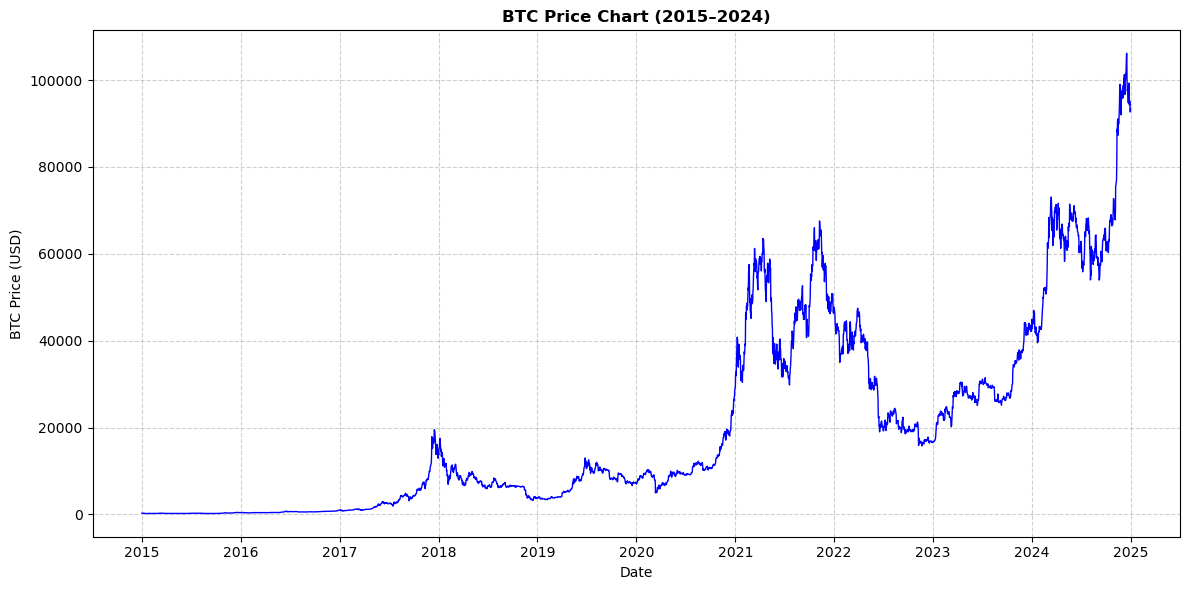

In [28]:
# Filter between 2015 and 2024
df = df[df["Date"].dt.year.between(2015, 2024)]

# Plot line chart with daily data points
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], color="blue", linewidth=1)

plt.xlabel("Date")
plt.ylabel("BTC Price (USD)")
plt.title("BTC Price Chart (2015–2024)", fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#### 2. What is Bitcoin Yearly Peak Price from 2015 - 2024?

In [29]:
# Filter only 2015–2024
df_filtered = df2[df2["Year"].between(2015, 2024)]

In [30]:
# Peak price (max High) per year
peak_per_year = df_filtered.groupby("Year")["High"].max().reset_index()

In [31]:
# Print results
print("BTC Peak Price per Year (2015–2024):")
print(peak_per_year)

BTC Peak Price per Year (2015–2024):
   Year           High
0  2015     495.562012
1  2016     979.396973
2  2017   20089.000000
3  2018   17712.400391
4  2019   13796.489258
5  2020   29244.876953
6  2021   68789.625000
7  2022   48086.835938
8  2023   44705.515625
9  2024  108268.445312


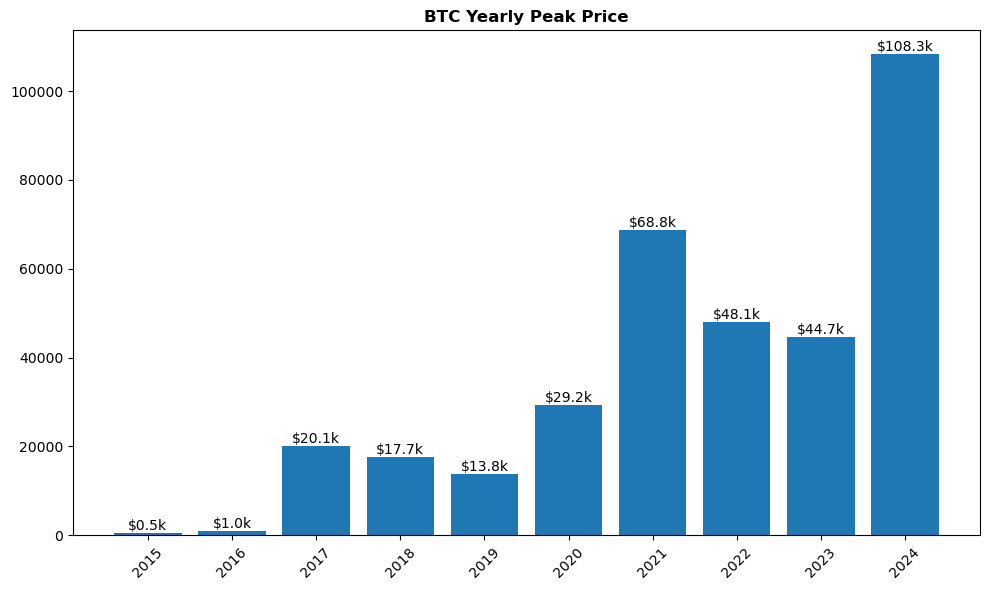

In [32]:
# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(peak_per_year["Year"].astype(str), peak_per_year["High"])

# Add data labels in $k with 1 decimal place
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # x-position (center of bar)
        height,                           # y-position (on top of bar)
        f"${height/1000:.1f}k",           # format as $k with 1 decimal
        ha="center", va="bottom", fontsize=10
    )

plt.title("BTC Yearly Peak Price", fontweight = "bold")   # <-- Updated title
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3. What is the Yearly BTC Price Increase?

In [33]:
# Keep only 2015–2024
year_range = df2[df2["Year"].between(2015, 2024)]

In [34]:
# Group by year and pick Jan 1 open & Dec 31 close
yearly_prices = year_range.sort_values("Date").groupby("Year").agg(
    Open_Jan1=("Open", "first"),
    Close_Dec31=("Close", "last")
).reset_index()

In [35]:
# Calculate yearly increase
yearly_prices["Increase"] = yearly_prices["Close_Dec31"] - yearly_prices["Open_Jan1"]

In [36]:
# Calculate percentage change
yearly_prices["Increase_%"] = (yearly_prices["Increase"] / yearly_prices["Open_Jan1"]) * 100

In [37]:
# Assign colors: green for positive, red for negative
colors = ["green" if x >= 0 else "red" for x in yearly_prices["Increase_%"]]

In [38]:
yearly_prices

,Year,Open_Jan1,Close_Dec31,Increase,Increase_%
0,2015,320.434998,430.566986,110.131989,34.369526
1,2016,430.721008,963.742981,533.021973,123.751097
2,2017,963.658020,14156.400391,13192.742371,1369.027404
3,2018,14112.200195,3742.700439,-10369.499756,-73.478973
4,2019,3746.713379,7193.599121,3446.885742,91.997583
5,2020,7194.892090,29001.720703,21806.828613,303.087640
6,2021,28994.009766,46306.445312,17312.435547,59.710387
7,2022,46311.746094,16547.496094,-29764.250000,-64.269332
8,2023,16547.914062,42265.187500,25717.273438,155.410968
9,2024,42280.234375,93429.203125,51148.968750,120.976077


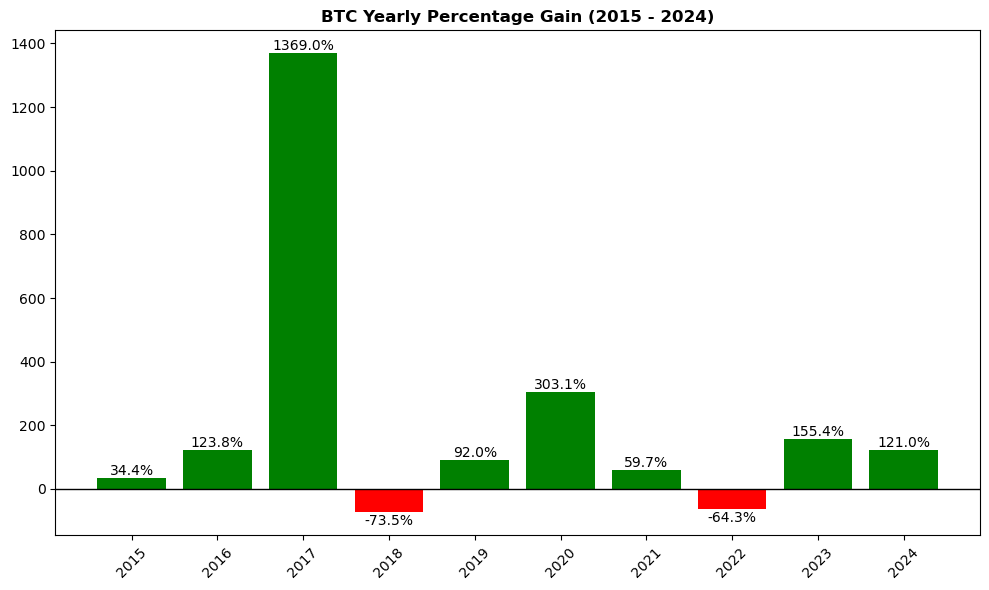

In [39]:
# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(yearly_prices["Year"].astype(str), yearly_prices["Increase_%"], color=colors)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height if height >= 0 else height - 5,  # adjust for negative labels
        f"{height:.1f}%",
        ha="center", va="bottom" if height >= 0 else "top",
        fontsize=10, color="black"
    )

plt.title("BTC Yearly Percentage Gain (2015 - 2024)", fontweight = "bold")
plt.xticks(rotation=45)
plt.axhline(0, color="black", linewidth=1)  # line for zero
plt.tight_layout()
plt.show()

#### 4. Top 10 best performing month of any year

In [40]:
# Extract year and month
df["Month_Name"] = df["Date"].dt.strftime("%b")  # month abbreviation

In [41]:
# Group by Year-Month to get first open and last close
monthly_prices = df.sort_values("Date").groupby(["Year", "Month", "Month_Name"]).agg(
    Open_Month=("Open", "first"),
    Close_Month=("Close", "last")
).reset_index()

In [42]:
# Calculate monthly percentage change
monthly_prices["Increase_%"] = (monthly_prices["Close_Month"] - monthly_prices["Open_Month"]) / monthly_prices["Open_Month"] * 100

In [43]:
# Get top 10 months
top10_months = monthly_prices.sort_values("Increase_%", ascending=False).head(10)

In [44]:
# Create labels like "Dec 2017"
top10_months["Label"] = top10_months["Month_Name"] + " " + top10_months["Year"].astype(str)

In [45]:
print("Top 10 Best Performing Months (by % Increase):")
print(top10_months)

Top 10 Best Performing Months (by % Increase):
     Year  Month Month_Name    Open_Month   Close_Month  Increase_%     Label
28   2017      5        May   1348.300049   2286.409912   69.577233  May 2017
31   2017      8        Aug   2871.300049   4703.390137   63.806988  Aug 2017
52   2019      5        May   5350.914551   8574.501953   60.243672  May 2019
34   2017     11        Nov   6440.970215  10233.599609   58.882890  Nov 2017
33   2017     10        Oct   4341.049805   6468.399902   49.005429  Oct 2017
71   2020     12        Dec  19633.769531  29001.720703   47.713462  Dec 2020
109  2024      2        Feb  42569.761719  61198.382812   43.760219  Feb 2024
70   2020     11        Nov  13780.995117  19625.835938   42.412328  Nov 2020
81   2021     10        Oct  43816.742188  61318.957031   39.944126  Oct 2021
96   2023      1        Jan  16547.914062  23139.283203   39.832024  Jan 2023


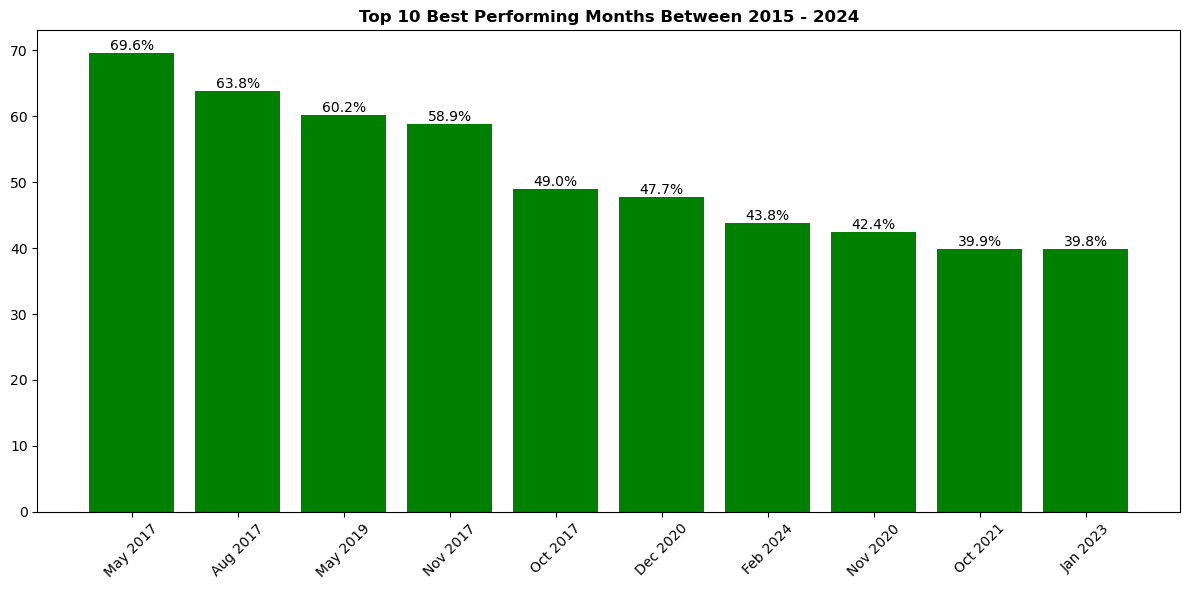

In [46]:

# Plot bar chart for top 10 months
plt.figure(figsize=(12,6))
bars = plt.bar(top10_months["Label"], top10_months["Increase_%"], color="green")

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.1f}%",
        ha="center", va="bottom", fontsize=10
    )

plt.title("Top 10 Best Performing Months Between 2015 - 2024", fontweight = "bold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
#### Top 10 worse performing month of any year

In [48]:
# Get top 10 months
worse10_months = monthly_prices.sort_values("Increase_%", ascending=False).tail(10)

In [49]:
# Create labels like "Dec 2017"
worse10_months["Label"] = worse10_months["Month_Name"] + " " + worse10_months["Year"].astype(str)

In [50]:
worse10_months

,Year,Month,Month_Name,Open_Month,Close_Month,Increase_%,Label
83,2021,12,Dec,56907.964844,46306.445312,-18.629237,Dec 2021
40,2018,5,May,9251.469727,7494.169922,-18.994818,May 2018
7,2015,8,Aug,284.686005,230.056000,-19.189565,Aug 2015
62,2020,3,Mar,8599.758789,6438.644531,-25.129940,Mar 2020
36,2018,1,Jan,14112.200195,10221.099609,-27.572601,Jan 2018
0,2015,1,Jan,320.434998,217.464005,-32.134752,Jan 2015
38,2018,3,Mar,10385.000000,6973.529785,-32.849978,Mar 2018
76,2021,5,May,57714.664062,37332.855469,-35.314783,May 2021
46,2018,11,Nov,6318.140137,4017.268555,-36.416913,Nov 2018
89,2022,6,Jun,31792.554688,19784.726562,-37.769309,Jun 2022


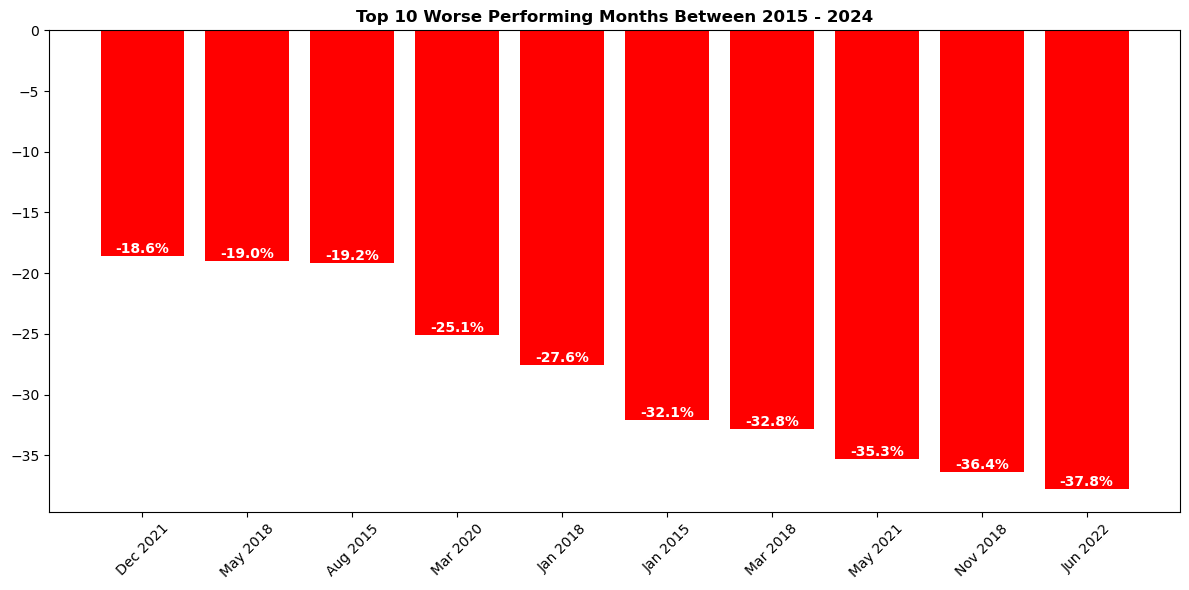

In [51]:

# Plot bar chart for top 10 months
plt.figure(figsize=(12,6))
bars = plt.bar(worse10_months["Label"], worse10_months["Increase_%"], color="red")

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.1f}%",
        ha="center", va="bottom", fontsize=10, fontweight = "bold", color = "white"
    )

plt.title("Top 10 Worse Performing Months Between 2015 - 2024", fontweight = "bold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 5. Bitcoin Monthly Price Performance HeatMap

In [52]:
# Pivot into matrix (Years = rows, Months = columns)
heatmap_data = monthly_prices.pivot(index="Year", columns="Month", values="Increase_%")

In [53]:
# Sort months correctly (Jan=1 ... Dec=12)
heatmap_data = heatmap_data.reindex(columns=range(1,13))

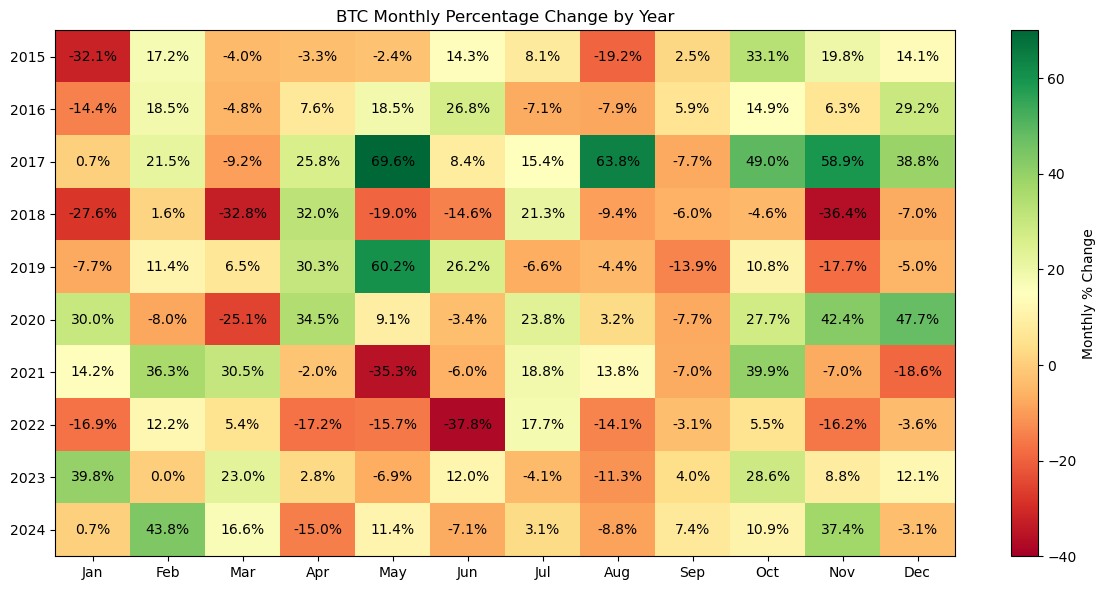

In [54]:
# Plot heatmap
plt.figure(figsize=(12,6))
plt.imshow(heatmap_data, cmap="RdYlGn", aspect="auto", vmin=-40, vmax=70)

# Add labels
plt.xticks(range(12), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

# Add color bar
cbar = plt.colorbar()
cbar.set_label("Monthly % Change")

# Add values on heatmap
for i in range(len(heatmap_data.index)):
    for j in range(12):
        value = heatmap_data.iloc[i, j]
        if pd.notna(value):
            plt.text(j, i, f"{value:.1f}%", ha="center", va="center", fontsize=10, color="black")

plt.title("BTC Monthly Percentage Change by Year")
plt.tight_layout()
plt.show()

#### 6. Bitcoin Monthly/Yearly Volatility

In [55]:
# Calculate daily returns (% change)
df["Return_%"] = df["Close"].pct_change() * 100

In [56]:
# --- Volatility per Year ---
volatility_yearly = df.groupby("Year")["Return_%"].std().reset_index()
volatility_yearly.columns = ["Year", "Volatility_%"]

In [57]:
# --- Volatility per Month (across all years) ---
volatility_monthly = df.groupby("Month_Name")["Return_%"].std().reindex(
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
).reset_index()
volatility_monthly.columns = ["Month", "Volatility_%"]

In [58]:
# Yearly volatility
print("Yearly Volatility (std dev of daily % changes):")
print(volatility_yearly)

Yearly Volatility (std dev of daily % changes):
   Year  Volatility_%
0  2015      3.604090
1  2016      2.513573
2  2017      4.991916
3  2018      4.243062
4  2019      3.562373
5  2020      3.770822
6  2021      4.209012
7  2022      3.325879
8  2023      2.290797
9  2024      2.802948


In [59]:
# Monthly volatility
print("\nMonthly Volatility (std dev of daily % changes across all years):")
print(volatility_monthly)


Monthly Volatility (std dev of daily % changes across all years):
   Month  Volatility_%
0    Jan      4.530792
1    Feb      3.797601
2    Mar      4.315961
3    Apr      2.987922
4    May      3.652537
5    Jun      3.821822
6    Jul      3.502517
7    Aug      3.144302
8    Sep      3.124697
9    Oct      2.517554
10   Nov      3.723782
11   Dec      3.902945


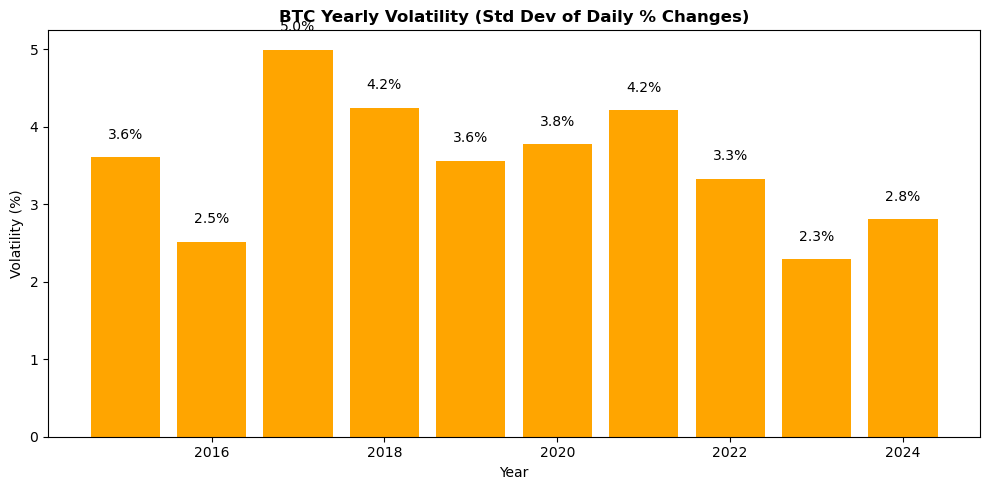

In [60]:
# --- Yearly Volatility Chart ---
plt.figure(figsize=(10,5))
plt.bar(volatility_yearly["Year"], volatility_yearly["Volatility_%"], color="orange")
for i, row in volatility_yearly.iterrows():
    plt.text(row["Year"], row["Volatility_%"]+0.2, f"{row['Volatility_%']:.1f}%", 
             ha="center", va="bottom", fontsize=10)
plt.title("BTC Yearly Volatility (Std Dev of Daily % Changes)", fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Volatility (%)")
plt.tight_layout()
plt.show()

###### Observation: Bitcoin Yearly Volatility seams to have dropped over time

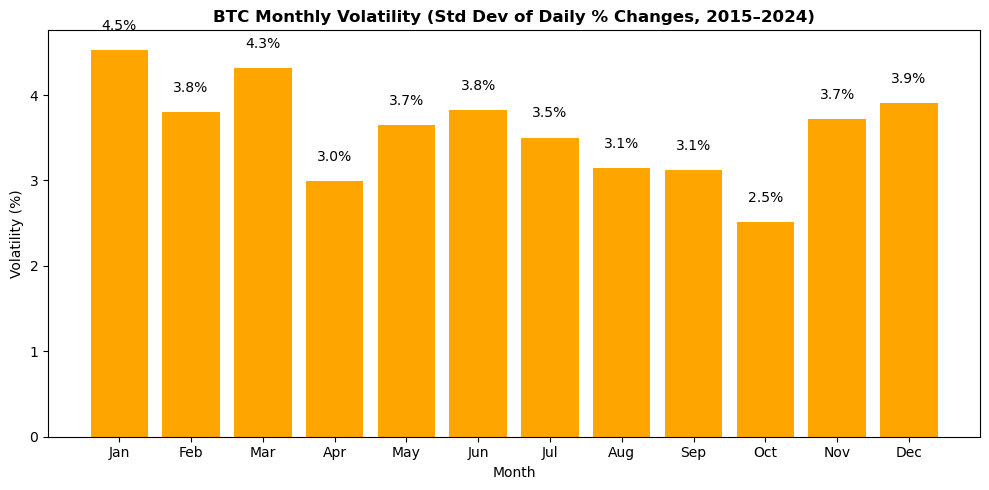

In [61]:
# --- Plot Monthly Volatility ---
plt.figure(figsize=(10,5))
plt.bar(volatility_monthly["Month"], volatility_monthly["Volatility_%"], color="orange")
for i, row in volatility_monthly.iterrows():
    plt.text(i, row["Volatility_%"]+0.2, f"{row['Volatility_%']:.1f}%", 
             ha="center", va="bottom", fontsize=10)
plt.title("BTC Monthly Volatility (Std Dev of Daily % Changes, 2015–2024)",  fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Volatility (%)")
plt.tight_layout()
plt.show()

###### Observation: Bitcoin seems to experience higher Volatility in the beginning and towards the end of the year

#### 7. BTC Average Monthly Performance across the Years

In [62]:
# Compute average performance by month across all years
seasonality = monthly_prices.groupby("Month")["Increase_%"].mean().reset_index()
seasonality["Month_Name"] = pd.to_datetime(seasonality["Month"], format='%m').dt.strftime('%b')

In [63]:
# Sort by calendar order
seasonality = seasonality.sort_values("Month")

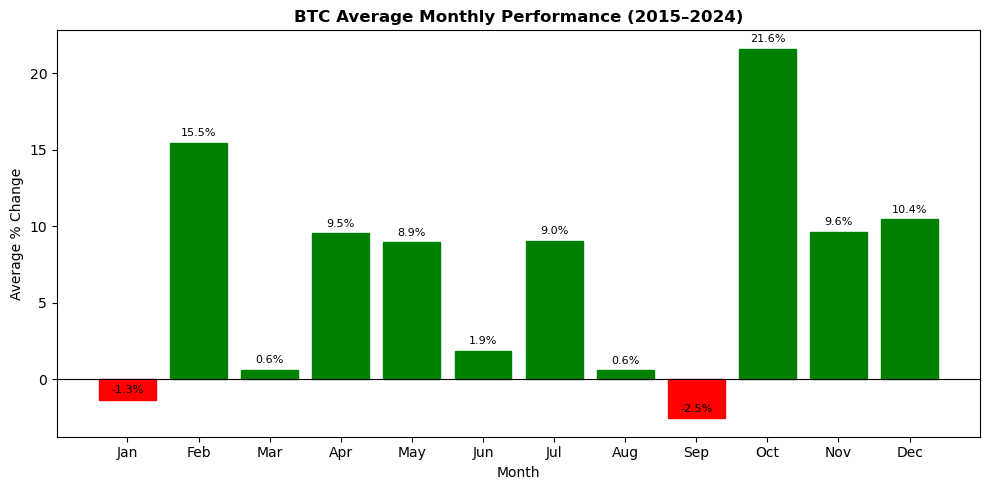

In [64]:
# --- Plot ---
plt.figure(figsize=(10,5))
bars = plt.bar(seasonality["Month_Name"], seasonality["Increase_%"], color="skyblue")

# Color positive months green, negative red
for bar, val in zip(bars, seasonality["Increase_%"]):
    bar.set_color("green" if val > 0 else "red")

# Add data labels
for i, row in seasonality.iterrows():
    plt.text(i, row["Increase_%"]+0.3, f"{row['Increase_%']:.1f}%", 
             ha="center", va="bottom", fontsize=8)

plt.title("BTC Average Monthly Performance (2015–2024)", fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Average % Change")
plt.axhline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()

##### Observation: BTC best performing months are February and October

#### 8. BTC Volume–Price Correlation

In [65]:
# --- Correlation ---
corr = df["Return_%"].corr(df["Volume"])
print(f"Correlation between Daily Returns and Volume: {corr:.3f}")

Correlation between Daily Returns and Volume: -0.006


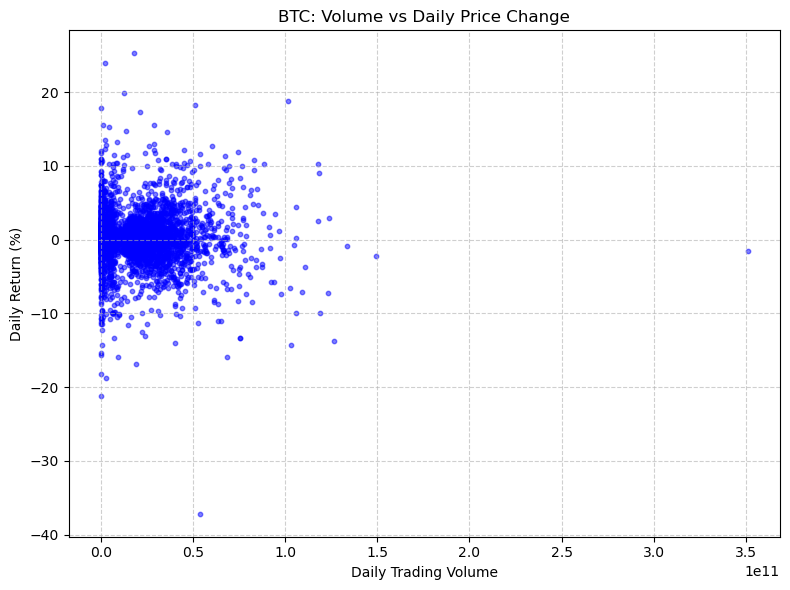

In [66]:
# --- Scatter Plot ---
plt.figure(figsize=(8,6))
plt.scatter(df["Volume"], df["Return_%"], alpha=0.5, s=10, color="blue")
plt.xlabel("Daily Trading Volume")
plt.ylabel("Daily Return (%)")
plt.title("BTC: Volume vs Daily Price Change")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

##### Observation: There is a weak correlation between trading volume and daily returns. More trading doesn’t reliably predict whether Bitcoin goes up or down that day.